In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('inmuebles_info_limpia.csv', encoding='utf-16', sep=';')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           126 non-null    int64  
 1   titulo               126 non-null    object 
 2   precio               126 non-null    int64  
 3   ubicacion            126 non-null    object 
 4   direccion            126 non-null    object 
 5   ascensor             61 non-null     float64
 6   baño                 125 non-null    float64
 7   año                  53 non-null     float64
 8   trastero             126 non-null    int64  
 9   orientacion          72 non-null     object 
 10  piso                 114 non-null    object 
 11  habitaciones         122 non-null    float64
 12  metros               126 non-null    int64  
 13  segunda_mano         126 non-null    int64  
 14  obra_nueva           126 non-null    int64  
 15  armarios_empotrados  126 non-null    int

In [4]:
count = df[df['precio'] < 150000].shape[0]
count

76

In [5]:
difference= 126 - count
print(difference)

print(difference/126*100, '% eliminadas')

50
39.682539682539684 % eliminadas


In [6]:
df= df[df['precio'] < 150000]

In [7]:
df.head()

,Unnamed: 0,titulo,precio,ubicacion,direccion,ascensor,baño,año,trastero,orientacion,...,segunda_mano,obra_nueva,armarios_empotrados,terraza,balcon,jardin,garaje,calefaccion,parcela,aire_acondicionado
4,4,Estudio en venta en carretera Virgen de la Nue...,46000,San Martín de Valdeiglesias,"['Carretera Virgen de la Nueva s/n', 'Urb. COS...",0.0,1.0,1986.0,0,norte,...,1,0,1,1,0,0,0,1,NaN,0
6,6,Piso en venta en calle de la Corredera Baja,57000,San Martín de Valdeiglesias,"['Calle de la Corredera Baja', 'San Martín de ...",0.0,1.0,NaN,0,NaN,...,1,0,1,1,0,0,0,1,NaN,0
7,7,Chalet pareado en venta en San Martín de Valde...,145000,Zona suroeste,"['San Martín de Valdeiglesias', 'Zona suroeste...",NaN,2.0,2006.0,1,sur,...,1,0,1,0,1,0,0,1,80.0,1
10,10,Chalet adosado en venta en San Martín de Valde...,120000,Zona suroeste,"['San Martín de Valdeiglesias', 'Zona suroeste...",NaN,1.0,1954.0,0,NaN,...,1,0,0,0,0,0,1,0,50.0,0
11,11,Piso en venta en San Martín de Valdeiglesias,89900,Zona suroeste,"['San Martín de Valdeiglesias', 'Zona suroeste...",0.0,1.0,1978.0,0,norte,...,1,0,1,1,0,0,0,1,NaN,1


In [8]:
# cuantas son NO nulas
df.describe()

,Unnamed: 0,precio,ascensor,baño,año,trastero,habitaciones,metros,segunda_mano,obra_nueva,armarios_empotrados,terraza,balcon,jardin,garaje,calefaccion,parcela,aire_acondicionado
count,76.000000,76.000000,58.000000,75.000000,29.000000,76.000000,72.000000,76.000000,76.0,76.0,76.000000,76.000000,76.000000,76.0,76.000000,76.000000,8.000000,76.000000
mean,67.184211,86342.105263,0.068966,1.240000,1974.137931,0.263158,2.444444,84.223684,1.0,0.0,0.644737,0.644737,0.276316,0.0,0.144737,0.618421,1970.250000,0.236842
std,34.720872,30438.507467,0.255609,0.460317,30.384117,0.443273,1.149267,59.764337,0.0,0.0,0.481773,0.481773,0.450146,0.0,0.354173,0.489002,3268.820746,0.427970
min,4.000000,40000.000000,0.000000,1.000000,1881.000000,0.000000,1.000000,30.000000,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,50.000000,0.000000
25%,40.500000,59975.000000,0.000000,1.000000,1974.000000,0.000000,2.000000,52.000000,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,75.000000,0.000000
50%,67.500000,77500.000000,0.000000,1.000000,1977.000000,0.000000,2.000000,65.000000,1.0,0.0,1.000000,1.000000,0.000000,0.0,0.000000,1.000000,185.000000,0.000000
75%,98.250000,115000.000000,0.000000,1.000000,1986.000000,1.000000,3.000000,90.000000,1.0,0.0,1.000000,1.000000,1.000000,0.0,0.000000,1.000000,2275.000000,0.000000
max,125.000000,145000.000000,1.000000,3.000000,2011.000000,1.000000,8.000000,426.000000,1.0,0.0,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,7502.000000,1.000000


In [9]:
vars1 = ['baño', 'ascensor', 'trastero', 'metros', 'armarios_empotrados', 'segunda_mano', 'obra_nueva'] + ['precio']
vars2 = ['terraza', 'balcon', 'jardin', 'garaje', 'calefaccion', 'aire_acondicionado'] + ['precio']

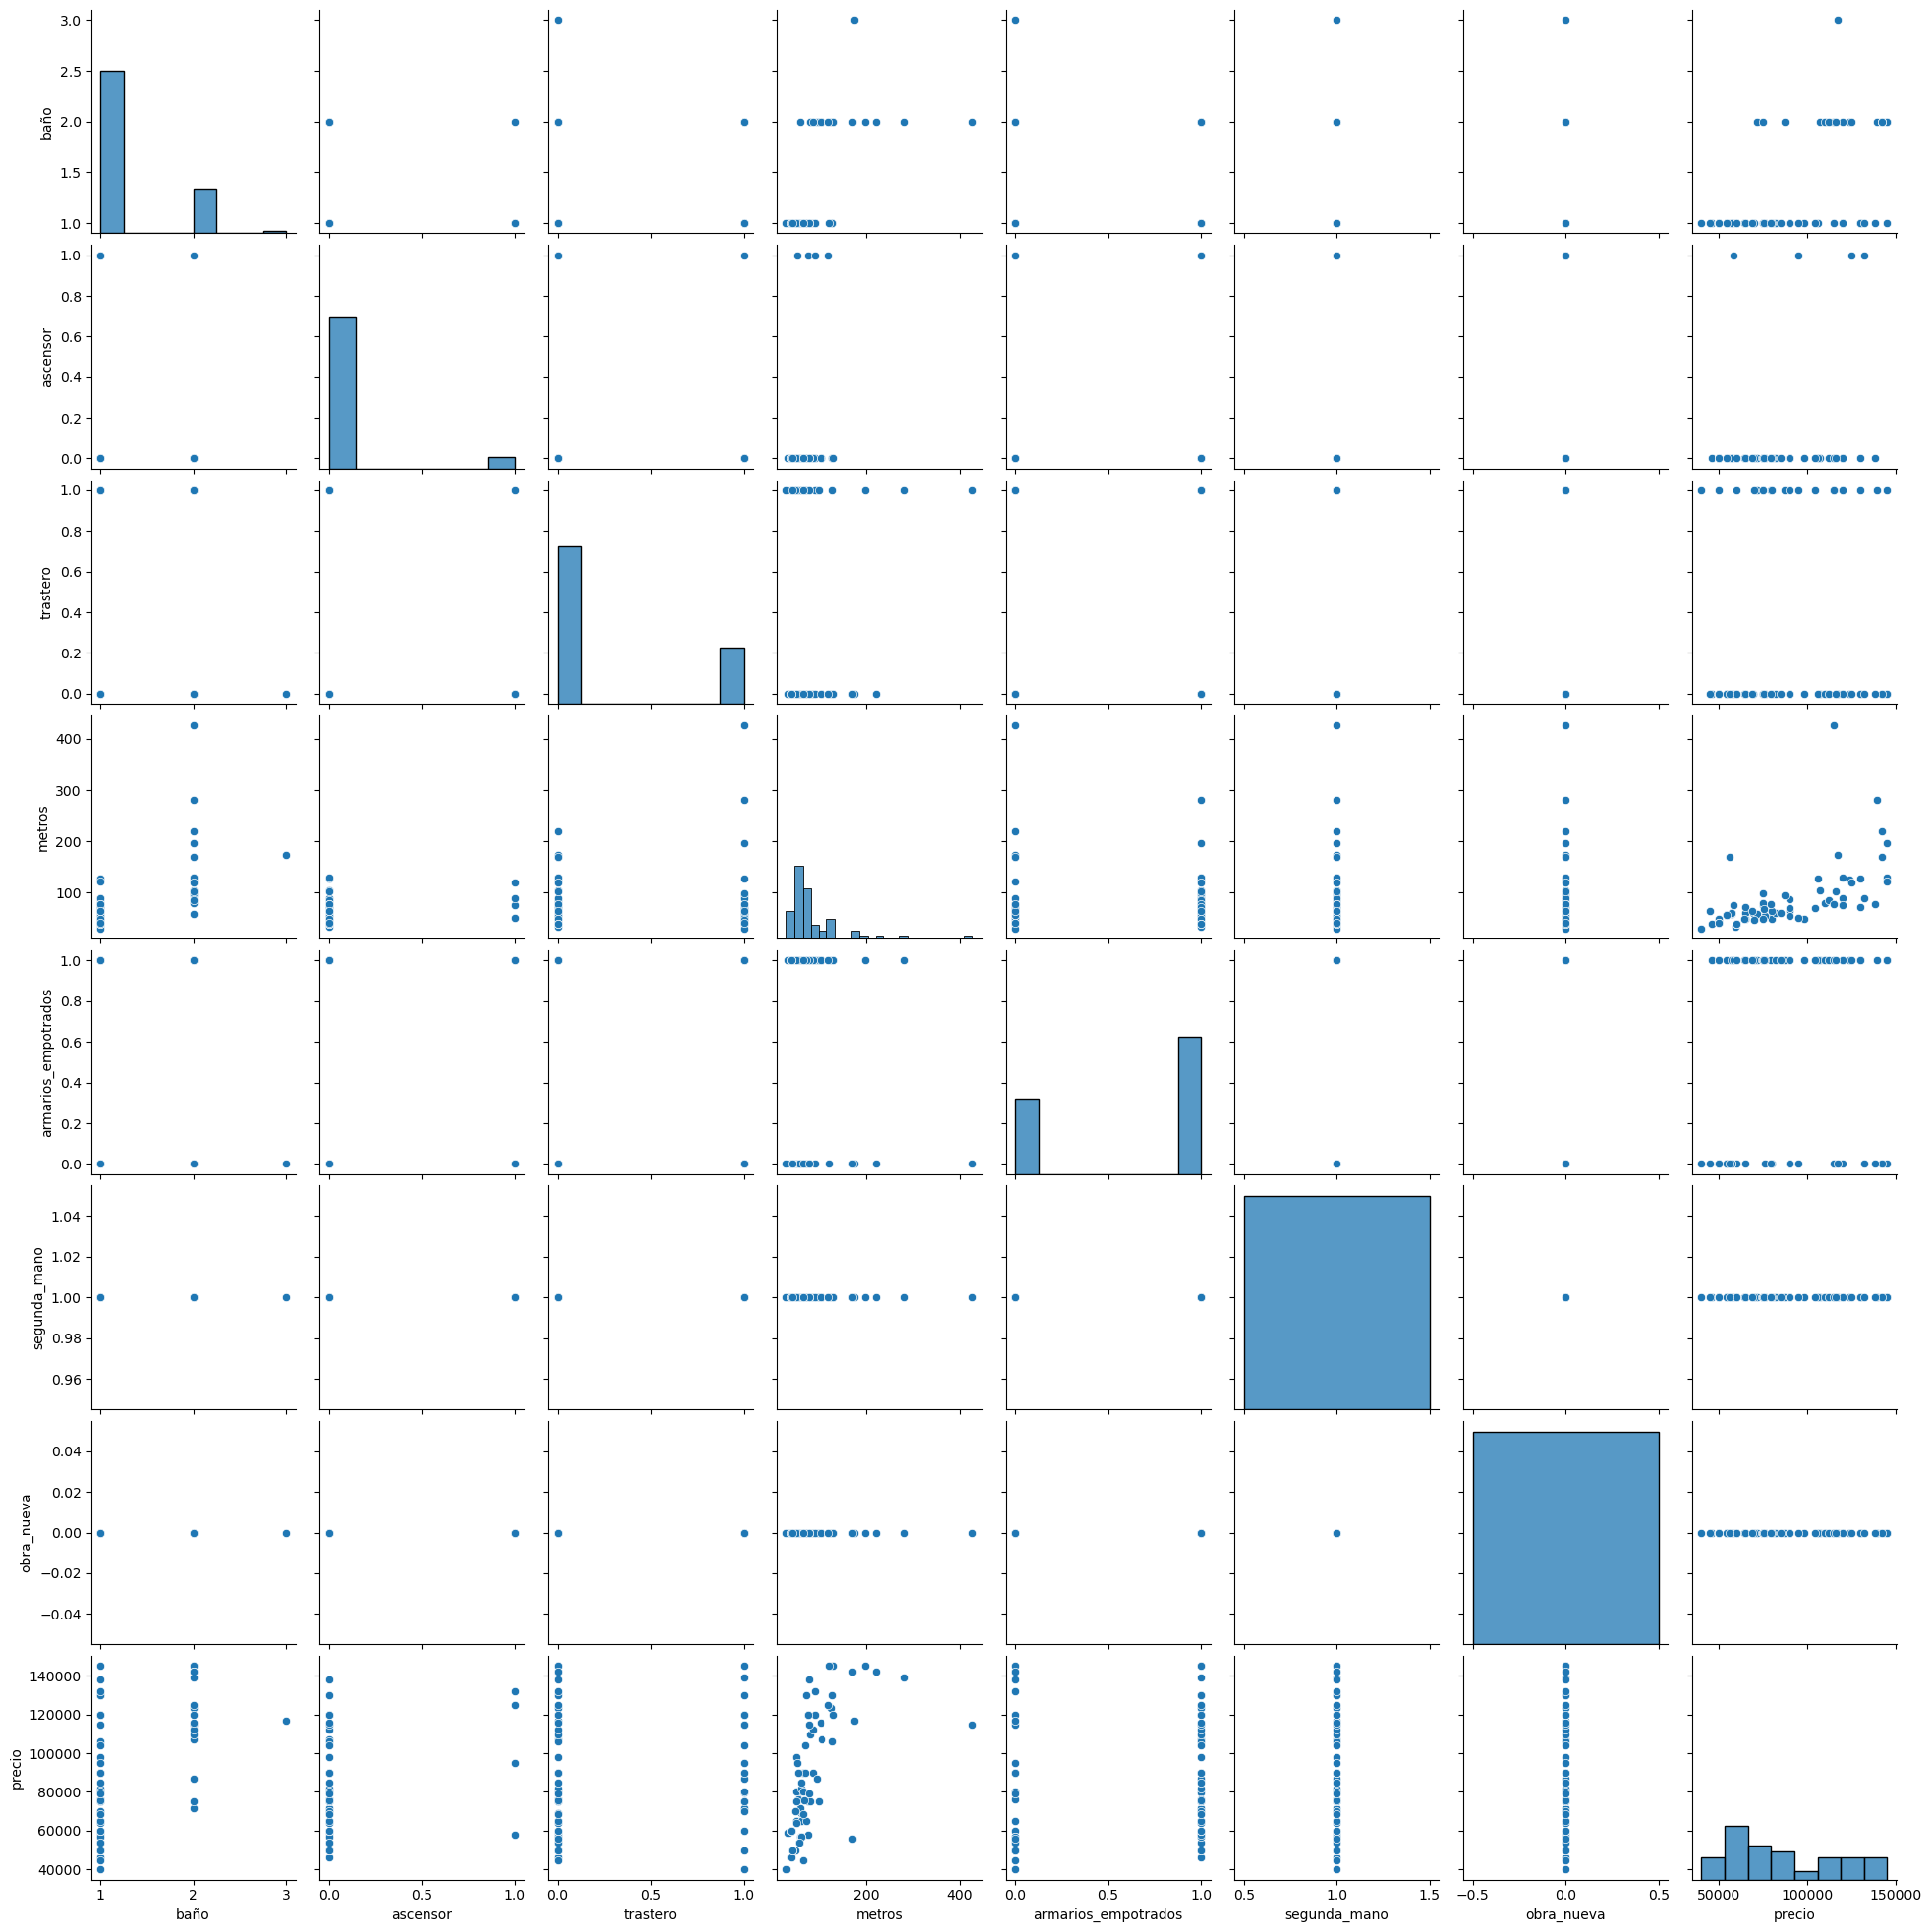

In [10]:
pair_plot= sns.pairplot(df[vars1])
plt.show()

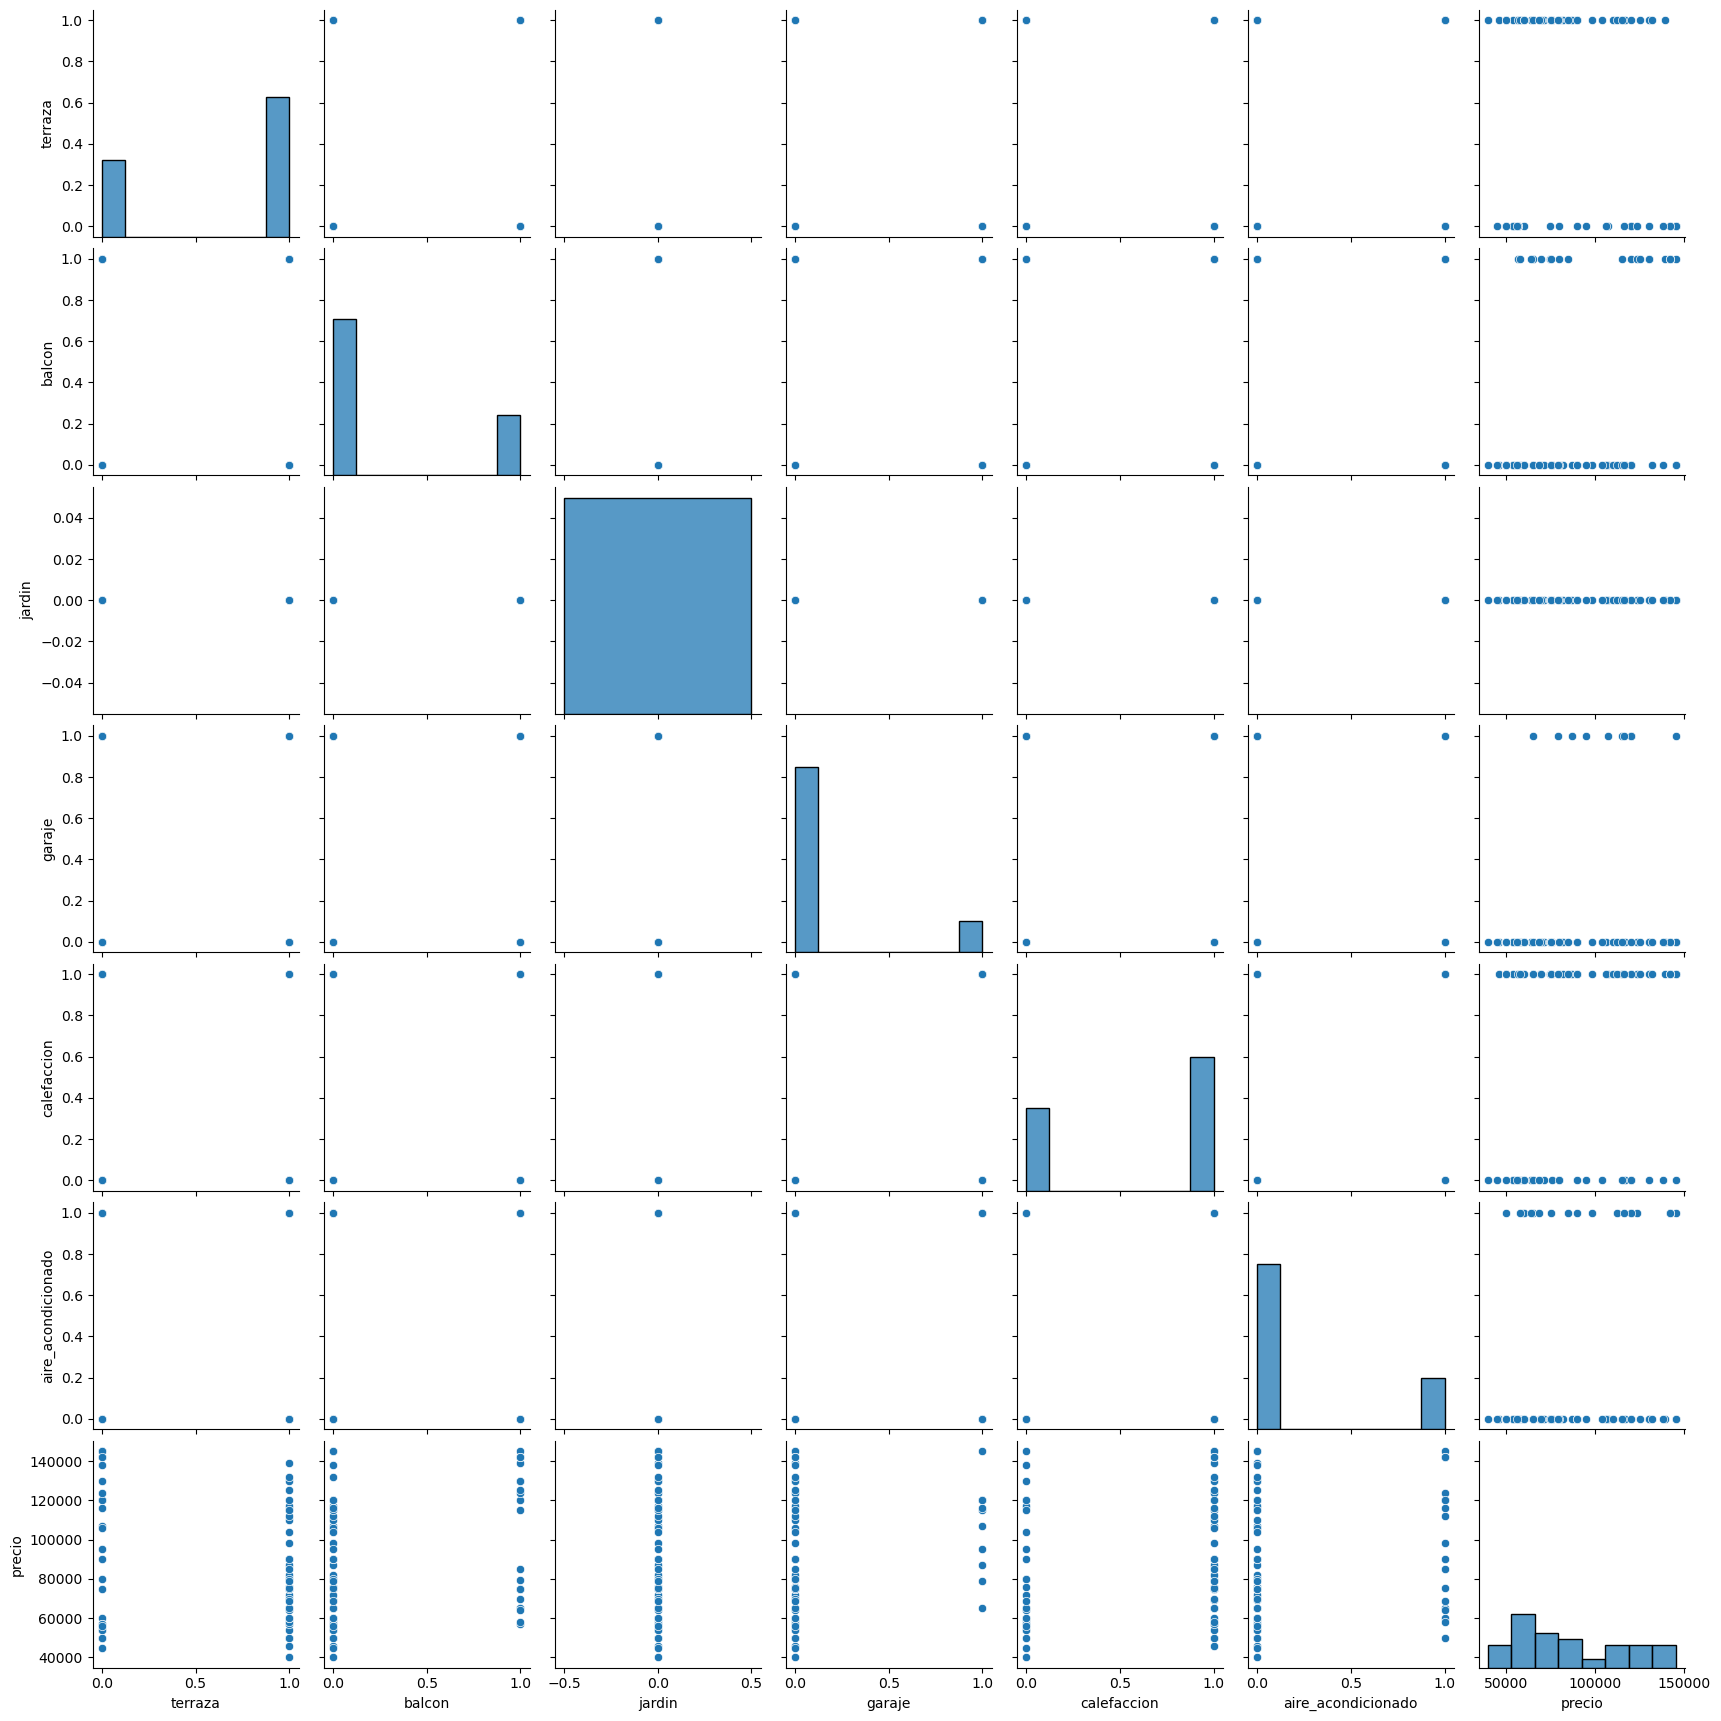

In [11]:
pair_plot= sns.pairplot(df[vars2])
plt.show()

# Precio

<Axes: xlabel='precio', ylabel='Count'>

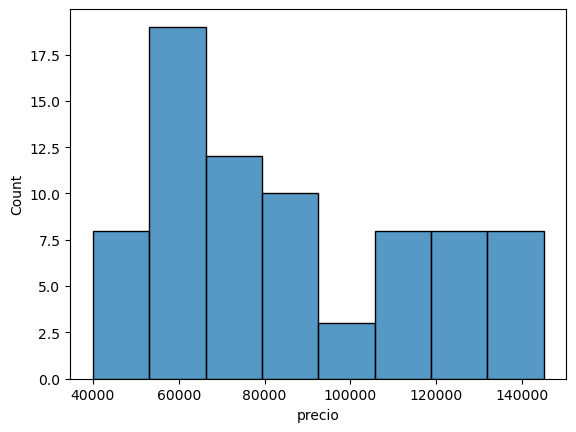

In [12]:
sns.histplot(data= df.precio)

# Ascensor

In [13]:
df['ascensor'].value_counts()

ascensor
0.0    54
1.0     4
Name: count, dtype: int64

In [14]:
sum(df.ascensor.isna())

18

vamos a ver qué pasa

In [15]:
df[df.ascensor.isna()]

,Unnamed: 0,titulo,precio,ubicacion,direccion,ascensor,baño,año,trastero,orientacion,...,segunda_mano,obra_nueva,armarios_empotrados,terraza,balcon,jardin,garaje,calefaccion,parcela,aire_acondicionado
7,7,Chalet pareado en venta en San Martín de Valde...,145000,Zona suroeste,"['San Martín de Valdeiglesias', 'Zona suroeste...",NaN,2.0,2006.0,1,sur,...,1,0,1,0,1,0,0,1,80.0,1
10,10,Chalet adosado en venta en San Martín de Valde...,120000,Zona suroeste,"['San Martín de Valdeiglesias', 'Zona suroeste...",NaN,1.0,1954.0,0,NaN,...,1,0,0,0,0,0,1,0,50.0,0
12,12,Chalet adosado en venta en San Martín de Valde...,129900,Zona suroeste,"['San Martín de Valdeiglesias', 'Zona suroeste...",NaN,1.0,NaN,1,sur,...,1,0,1,1,1,0,0,1,200.0,0
32,32,Chalet adosado en venta en San Martín de Valde...,115000,Zona suroeste,"['San Martín de Valdeiglesias', 'Zona suroeste...",NaN,2.0,NaN,1,norte,...,1,0,0,1,1,0,1,1,NaN,0
33,33,Finca rústica en venta en San Martin de Valdei...,145000,San Martín de Valdeiglesias,"['San Martin de Valdeiglesias', 'San Martín de...",NaN,2.0,NaN,0,NaN,...,1,0,1,0,0,0,0,1,7000.0,0
34,34,"Chalet adosado en venta en calle de la Goleta, 13",139000,San Martín de Valdeiglesias,"['Calle de la Goleta, 13', 'Urb. urb costa de ...",NaN,2.0,1986.0,1,sur,...,1,0,1,1,1,0,0,1,60.0,0
45,45,"Chalet adosado en venta en rosario, 1",80000,San Martín de Valdeiglesias,"['Rosario, 1', 'Urb. CASCO URBANO', 'San Martí...",NaN,1.0,1970.0,0,sur,...,1,0,0,0,0,0,0,0,NaN,0
55,55,Casa de pueblo en venta en calle de la Correde...,142000,San Martín de Valdeiglesias,"['Calle de la Corredera Baja, 9', 'San Martín ...",NaN,2.0,NaN,0,este,...,1,0,0,0,1,0,0,1,NaN,1
59,59,Finca rústica en venta en carretera de la vía s/n,145000,San Martín de Valdeiglesias,"['Carretera de la vía s/n', 'San Martín de Val...",NaN,1.0,NaN,0,NaN,...,1,0,0,0,0,0,1,0,7502.0,0
62,62,Chalet pareado en venta en San Martín de Valde...,86900,Zona suroeste,"['San Martín de Valdeiglesias', 'Zona suroeste...",NaN,2.0,1975.0,1,norte,...,1,0,1,1,0,0,1,1,NaN,0


In [16]:
df= df.drop([33, 59, 109])
df = df.reset_index(drop=True)
df[df.ascensor.isna()]

,Unnamed: 0,titulo,precio,ubicacion,direccion,ascensor,baño,año,trastero,orientacion,...,segunda_mano,obra_nueva,armarios_empotrados,terraza,balcon,jardin,garaje,calefaccion,parcela,aire_acondicionado
2,7,Chalet pareado en venta en San Martín de Valde...,145000,Zona suroeste,"['San Martín de Valdeiglesias', 'Zona suroeste...",NaN,2.0,2006.0,1,sur,...,1,0,1,0,1,0,0,1,80.0,1
3,10,Chalet adosado en venta en San Martín de Valde...,120000,Zona suroeste,"['San Martín de Valdeiglesias', 'Zona suroeste...",NaN,1.0,1954.0,0,NaN,...,1,0,0,0,0,0,1,0,50.0,0
5,12,Chalet adosado en venta en San Martín de Valde...,129900,Zona suroeste,"['San Martín de Valdeiglesias', 'Zona suroeste...",NaN,1.0,NaN,1,sur,...,1,0,1,1,1,0,0,1,200.0,0
14,32,Chalet adosado en venta en San Martín de Valde...,115000,Zona suroeste,"['San Martín de Valdeiglesias', 'Zona suroeste...",NaN,2.0,NaN,1,norte,...,1,0,0,1,1,0,1,1,NaN,0
15,34,"Chalet adosado en venta en calle de la Goleta, 13",139000,San Martín de Valdeiglesias,"['Calle de la Goleta, 13', 'Urb. urb costa de ...",NaN,2.0,1986.0,1,sur,...,1,0,1,1,1,0,0,1,60.0,0
21,45,"Chalet adosado en venta en rosario, 1",80000,San Martín de Valdeiglesias,"['Rosario, 1', 'Urb. CASCO URBANO', 'San Martí...",NaN,1.0,1970.0,0,sur,...,1,0,0,0,0,0,0,0,NaN,0
26,55,Casa de pueblo en venta en calle de la Correde...,142000,San Martín de Valdeiglesias,"['Calle de la Corredera Baja, 9', 'San Martín ...",NaN,2.0,NaN,0,este,...,1,0,0,0,1,0,0,1,NaN,1
31,62,Chalet pareado en venta en San Martín de Valde...,86900,Zona suroeste,"['San Martín de Valdeiglesias', 'Zona suroeste...",NaN,2.0,1975.0,1,norte,...,1,0,1,1,0,0,1,1,NaN,0
37,69,Chalet pareado en venta en San Martín de Valde...,44900,Zona suroeste,"['San Martín de Valdeiglesias', 'Zona suroeste...",NaN,1.0,1881.0,0,norte,...,1,0,0,0,0,0,0,0,NaN,0
40,72,Chalet adosado en venta en San Martín de Valde...,109900,Zona suroeste,"['San Martín de Valdeiglesias', 'Zona suroeste...",NaN,2.0,1910.0,0,norte,...,1,0,1,1,0,0,0,1,NaN,0


In [17]:
df.loc[df['ascensor'].isna(), 'ascensor'] = 0
df[df.ascensor.isna()]

,Unnamed: 0,titulo,precio,ubicacion,direccion,ascensor,baño,año,trastero,orientacion,...,segunda_mano,obra_nueva,armarios_empotrados,terraza,balcon,jardin,garaje,calefaccion,parcela,aire_acondicionado


# Baños

In [18]:
sum(df['baño'].value_counts())

72

In [19]:
df[df.baño.isna()]

,Unnamed: 0,titulo,precio,ubicacion,direccion,ascensor,baño,año,trastero,orientacion,...,segunda_mano,obra_nueva,armarios_empotrados,terraza,balcon,jardin,garaje,calefaccion,parcela,aire_acondicionado
71,124,Casa de pueblo en venta en calle de la Cuesta ...,56000,San Martín de Valdeiglesias,"['Calle de la Cuesta del Castillo, 3', 'San Ma...",0.0,NaN,NaN,0,NaN,...,1,0,0,0,0,0,0,0,170.0,0


In [20]:
df.loc[df['baño'].isna()]=1
df[df.baño.isna()]

,Unnamed: 0,titulo,precio,ubicacion,direccion,ascensor,baño,año,trastero,orientacion,...,segunda_mano,obra_nueva,armarios_empotrados,terraza,balcon,jardin,garaje,calefaccion,parcela,aire_acondicionado


# Año

In [21]:
sum(df.año.isna())/73

0.589041095890411

In [22]:
df.drop(columns= ['año'], inplace= True)

# Trastero

In [23]:
df['trastero'].value_counts()

trastero
0    53
1    20
Name: count, dtype: int64

# Orientación

In [24]:
sum(df['orientacion'].value_counts())

47

In [25]:
df[df.orientacion.isna()]

,Unnamed: 0,titulo,precio,ubicacion,direccion,ascensor,baño,trastero,orientacion,piso,...,segunda_mano,obra_nueva,armarios_empotrados,terraza,balcon,jardin,garaje,calefaccion,parcela,aire_acondicionado
1,6,Piso en venta en calle de la Corredera Baja,57000,San Martín de Valdeiglesias,"['Calle de la Corredera Baja', 'San Martín de ...",0.0,1.0,0,NaN,Planta 2ª exterior,...,1,0,1,1,0,0,0,1,NaN,0
3,10,Chalet adosado en venta en San Martín de Valde...,120000,Zona suroeste,"['San Martín de Valdeiglesias', 'Zona suroeste...",0.0,1.0,0,NaN,NaN,...,1,0,0,0,0,0,1,0,50.0,0
6,13,Piso en venta en San Martín de Valdeiglesias,90000,Zona suroeste,"['San Martín de Valdeiglesias', 'Zona suroeste...",0.0,1.0,0,NaN,Planta 1ª exterior,...,1,0,0,1,0,0,0,0,NaN,0
10,23,Piso en venta en avenida de la Costa de Madrid,49900,San Martín de Valdeiglesias,"['Avenida de la Costa de Madrid', 'San Martín ...",0.0,1.0,0,NaN,Planta 1ª exterior,...,1,0,0,0,0,0,0,1,NaN,0
13,31,"Piso en venta en avenida de la Costa de Madrid, 3",50000,San Martín de Valdeiglesias,"['Avenida de la Costa de Madrid, 3', 'Urb. Cos...",0.0,1.0,0,NaN,Bajo exterior,...,1,0,1,1,0,0,0,1,NaN,0
17,39,Estudio en venta en avenida colon,59900,San Martín de Valdeiglesias,"['Avenida colon', 'San Martín de Valdeiglesias...",0.0,1.0,1,NaN,Planta 1ª exterior,...,1,0,0,0,0,0,0,1,NaN,1
24,53,Piso en venta en Costa de Madrid,50000,San Martín de Valdeiglesias,"['Costa de Madrid', 'San Martín de Valdeiglesi...",0.0,1.0,0,NaN,Planta 1ª exterior,...,1,0,1,1,0,0,0,1,NaN,1
27,56,Piso en venta en calle de José López Hermosill...,106000,San Martín de Valdeiglesias,"['Calle de José López Hermosilla, 2', 'San Mar...",0.0,1.0,0,NaN,Bajo exterior,...,1,0,1,0,0,0,0,1,NaN,0
33,65,Piso en venta en calle del Mediodía Alta,95000,San Martín de Valdeiglesias,"['Calle del Mediodía Alta', 'San Martín de Val...",1.0,1.0,1,NaN,Bajo exterior,...,1,0,0,0,0,0,1,0,NaN,0
34,66,Piso en venta en calle de la Corredera Baja,57000,San Martín de Valdeiglesias,"['Calle de la Corredera Baja', 'San Martín de ...",0.0,1.0,0,NaN,Planta 2ª exterior,...,1,0,0,0,0,0,0,0,NaN,0


In [26]:
# Create a boolean mask to identify rows to delete
mask = df['titulo'].str.contains('costa de madrid', case=False, na=False) | df['direccion'].str.contains('costa de madrid', case=False, na=False)

In [27]:
# Drop the rows that match the mask
df = df[~mask]

In [28]:
# Reset the index
df = df.reset_index(drop=True)

In [29]:
df.orientacion= df.orientacion.fillna('None')

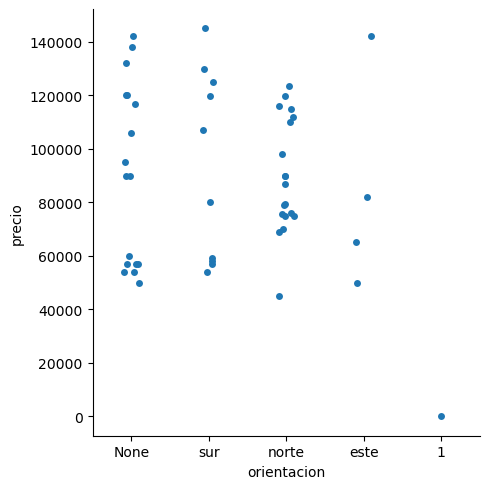

In [30]:
sns.catplot(x='orientacion', y='precio', data=df)

In [31]:
df = df[df['orientacion'] != 1]

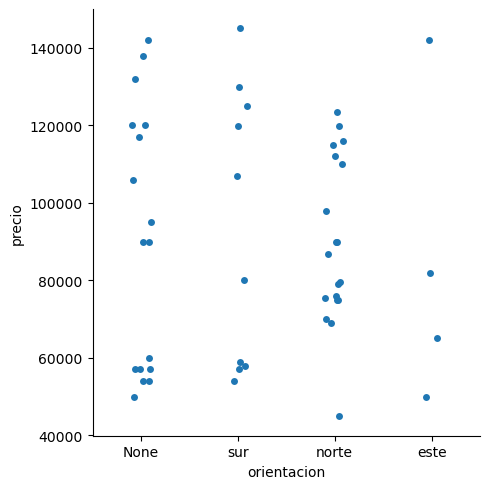

In [32]:
sns.catplot(x='orientacion', y='precio', data=df)

In [33]:
df.drop(columns=['orientacion'], inplace=True)

# Segunda Mano - Obra Nueva

se debería corregir para:
- SegundaMano/buen estado
- SegundaMano/para reformar

Solo se ha cogido si es segunda mano

In [34]:
df[df.obra_nueva.isna()]

,Unnamed: 0,titulo,precio,ubicacion,direccion,ascensor,baño,trastero,piso,habitaciones,...,segunda_mano,obra_nueva,armarios_empotrados,terraza,balcon,jardin,garaje,calefaccion,parcela,aire_acondicionado


In [35]:
df.drop(columns= ['segunda_mano', 'obra_nueva'], inplace=True )

In [36]:
df.head()

,Unnamed: 0,titulo,precio,ubicacion,direccion,ascensor,baño,trastero,piso,habitaciones,metros,armarios_empotrados,terraza,balcon,jardin,garaje,calefaccion,parcela,aire_acondicionado
0,6,Piso en venta en calle de la Corredera Baja,57000,San Martín de Valdeiglesias,"['Calle de la Corredera Baja', 'San Martín de ...",0.0,1.0,0,Planta 2ª exterior,3.0,58,1,1,0,0,0,1,NaN,0
1,7,Chalet pareado en venta en San Martín de Valde...,145000,Zona suroeste,"['San Martín de Valdeiglesias', 'Zona suroeste...",0.0,2.0,1,4 plantas,5.0,197,1,0,1,0,0,1,80.0,1
2,10,Chalet adosado en venta en San Martín de Valde...,120000,Zona suroeste,"['San Martín de Valdeiglesias', 'Zona suroeste...",0.0,1.0,0,NaN,3.0,76,0,0,0,0,1,0,50.0,0
3,11,Piso en venta en San Martín de Valdeiglesias,89900,Zona suroeste,"['San Martín de Valdeiglesias', 'Zona suroeste...",0.0,1.0,0,Planta 1ª exterior,3.0,87,1,1,0,0,0,1,NaN,1
4,12,Chalet adosado en venta en San Martín de Valde...,129900,Zona suroeste,"['San Martín de Valdeiglesias', 'Zona suroeste...",0.0,1.0,1,2 plantas,2.0,127,1,1,1,0,0,1,200.0,0


In [37]:
df.drop(columns= ['Unnamed: 0'], inplace=True )

In [38]:
df.head()

,titulo,precio,ubicacion,direccion,ascensor,baño,trastero,piso,habitaciones,metros,armarios_empotrados,terraza,balcon,jardin,garaje,calefaccion,parcela,aire_acondicionado
0,Piso en venta en calle de la Corredera Baja,57000,San Martín de Valdeiglesias,"['Calle de la Corredera Baja', 'San Martín de ...",0.0,1.0,0,Planta 2ª exterior,3.0,58,1,1,0,0,0,1,NaN,0
1,Chalet pareado en venta en San Martín de Valde...,145000,Zona suroeste,"['San Martín de Valdeiglesias', 'Zona suroeste...",0.0,2.0,1,4 plantas,5.0,197,1,0,1,0,0,1,80.0,1
2,Chalet adosado en venta en San Martín de Valde...,120000,Zona suroeste,"['San Martín de Valdeiglesias', 'Zona suroeste...",0.0,1.0,0,NaN,3.0,76,0,0,0,0,1,0,50.0,0
3,Piso en venta en San Martín de Valdeiglesias,89900,Zona suroeste,"['San Martín de Valdeiglesias', 'Zona suroeste...",0.0,1.0,0,Planta 1ª exterior,3.0,87,1,1,0,0,0,1,NaN,1
4,Chalet adosado en venta en San Martín de Valde...,129900,Zona suroeste,"['San Martín de Valdeiglesias', 'Zona suroeste...",0.0,1.0,1,2 plantas,2.0,127,1,1,1,0,0,1,200.0,0


# Piso

In [39]:
df['piso'].value_counts()

piso
Planta 1ª exterior      14
Planta 2ª exterior      11
2 plantas                5
Planta 3ª exterior       4
Bajo exterior            4
3 plantas                3
Planta 2ª                2
4 plantas                1
5 plantas                1
Planta 4ª exterior       1
Entreplanta exterior     1
Name: count, dtype: int64

In [40]:
# def process_piso(serie):
#     lista= serie.split()
#     mapeo= ''
#     if ((lista[0] == 'Bajo') | (lista[0] == 'Entreplanta') | (lista[0] == 'Exterior')):
#         mapeo= 'Bajo'
#     elif lista[0] == 'Planta':
#         if int(lista[1][0]) < 4:
#             mapeo = 'Primeros_pisos'
#         else:
#             mapeo= 'Ultimos_pisos'
#     else:
#         mapeo= 'Muchas_plantas'
#     return(mapeo)

In [42]:
df[df['piso'] == 'Entreplanta exterior']

,titulo,precio,ubicacion,direccion,ascensor,baño,trastero,piso,habitaciones,metros,armarios_empotrados,terraza,balcon,jardin,garaje,calefaccion,parcela,aire_acondicionado
43,Piso en venta en avenida del Galeón,49900,San Martín de Valdeiglesias,"['Avenida del Galeón', 'Urb. Urbanización Pron...",0.0,1.0,0,Entreplanta exterior,2.0,42,0,1,0,0,0,1,NaN,0


In [43]:
mask = df['direccion'].str.contains('pronto', case=False, na=False)

df = df[~mask]

df = df.reset_index(drop=True)

In [45]:
df['piso'].value_counts()

piso
Planta 2ª exterior    10
Planta 1ª exterior     9
2 plantas              5
Planta 3ª exterior     4
Bajo exterior          4
3 plantas              3
Planta 2ª              2
4 plantas              1
5 plantas              1
Planta 4ª exterior     1
Name: count, dtype: int64

In [46]:
df['piso']= df['piso'].replace('Planta 2ª', 'Planta 2ª exterior')
df['piso'].value_counts()

piso
Planta 2ª exterior    12
Planta 1ª exterior     9
2 plantas              5
Planta 3ª exterior     4
Bajo exterior          4
3 plantas              3
4 plantas              1
5 plantas              1
Planta 4ª exterior     1
Name: count, dtype: int64

# Habitaciones

In [47]:
df['habitaciones'].value_counts()

habitaciones
3.0    20
2.0    13
1.0     3
5.0     2
4.0     2
8.0     1
Name: count, dtype: int64

# Metros

In [48]:
df['metros'].value_counts()

metros
60     4
55     3
77     2
90     2
50     2
80     2
65     2
127    2
56     2
129    1
103    1
85     1
70     1
125    1
120    1
75     1
220    1
99     1
58     1
173    1
52     1
197    1
95     1
170    1
57     1
40     1
426    1
105    1
87     1
76     1
42     1
Name: count, dtype: int64

# Armarios

In [50]:
df['armarios_empotrados'].value_counts()

armarios_empotrados
1    24
0    19
Name: count, dtype: int64

# Terraza

In [52]:
df['terraza'].value_counts()

terraza
0    22
1    21
Name: count, dtype: int64

# Balcon

In [53]:
df['balcon'].value_counts()

balcon
0    31
1    12
Name: count, dtype: int64

# Jardin

In [54]:
df['jardin'].value_counts()

jardin
0    43
Name: count, dtype: int64

In [55]:
df.drop(columns= ['jardin'], inplace=True)

# Garaje

In [56]:
df['garaje'].value_counts()

garaje
0    34
1     9
Name: count, dtype: int64

# Calefacción

In [58]:
df['calefaccion'].value_counts()

calefaccion
1    29
0    14
Name: count, dtype: int64

# Aire Acondicionado

In [59]:
df['aire_acondicionado'].value_counts()

aire_acondicionado
0    32
1    11
Name: count, dtype: int64

# Parcela

In [64]:
df['parcela'].value_counts()

3

In [66]:
df[df.parcela.isna()]

,titulo,precio,ubicacion,direccion,ascensor,baño,trastero,piso,habitaciones,metros,armarios_empotrados,terraza,balcon,garaje,calefaccion,parcela,aire_acondicionado
0,Piso en venta en calle de la Corredera Baja,57000,San Martín de Valdeiglesias,"['Calle de la Corredera Baja', 'San Martín de ...",0.0,1.0,0,Planta 2ª exterior,3.0,58,1,1,0,0,1,NaN,0
3,Piso en venta en San Martín de Valdeiglesias,89900,Zona suroeste,"['San Martín de Valdeiglesias', 'Zona suroeste...",0.0,1.0,0,Planta 1ª exterior,3.0,87,1,1,0,0,1,NaN,1
5,Piso en venta en San Martín de Valdeiglesias,90000,Zona suroeste,"['San Martín de Valdeiglesias', 'Zona suroeste...",0.0,1.0,0,Planta 1ª exterior,2.0,65,0,1,0,0,0,NaN,0
6,Piso en venta en calle de Colon,79500,San Martín de Valdeiglesias,"['Calle de Colon', 'San Martín de Valdeiglesia...",0.0,1.0,1,Planta 2ª exterior,2.0,55,1,1,1,0,1,NaN,0
7,"Piso en venta en avenida del Galeón, 80",98000,San Martín de Valdeiglesias,"['Avenida del Galeón, 80', 'San Martín de Vald...",0.0,1.0,0,Planta 2ª exterior,1.0,50,1,1,0,0,1,NaN,1
8,"Dúplex en venta en plaza Castillo, 15",107000,San Martín de Valdeiglesias,"['Plaza Castillo, 15', 'San Martín de Valdeigl...",0.0,2.0,0,Planta 1ª exterior,3.0,105,1,0,0,1,1,NaN,0
9,"Piso en venta en Galeon, 80",69000,San Martín de Valdeiglesias,"['GALEON, 80', 'Urb. COSTA MADRID', 'San Martí...",0.0,1.0,0,Planta 3ª exterior,3.0,60,1,1,0,0,1,NaN,0
10,Chalet adosado en venta en San Martín de Valde...,115000,Zona suroeste,"['San Martín de Valdeiglesias', 'Zona suroeste...",0.0,2.0,1,5 plantas,8.0,426,0,1,1,1,1,NaN,0
11,Estudio en venta en avenida colon,59900,San Martín de Valdeiglesias,"['Avenida colon', 'San Martín de Valdeiglesias...",0.0,1.0,1,Planta 1ª exterior,NaN,40,0,0,0,0,1,NaN,1
12,Piso en venta en carretera de Ávila,54000,San Martín de Valdeiglesias,"['Carretera de Ávila', 'San Martín de Valdeigl...",0.0,1.0,0,Planta 2ª exterior,3.0,57,1,1,0,0,1,NaN,0


In [68]:
df.drop(columns= ['parcela'], inplace=True)
df.head()

,titulo,precio,ubicacion,direccion,ascensor,baño,trastero,piso,habitaciones,metros,armarios_empotrados,terraza,balcon,garaje,calefaccion,aire_acondicionado
0,Piso en venta en calle de la Corredera Baja,57000,San Martín de Valdeiglesias,"['Calle de la Corredera Baja', 'San Martín de ...",0.0,1.0,0,Planta 2ª exterior,3.0,58,1,1,0,0,1,0
1,Chalet pareado en venta en San Martín de Valde...,145000,Zona suroeste,"['San Martín de Valdeiglesias', 'Zona suroeste...",0.0,2.0,1,4 plantas,5.0,197,1,0,1,0,1,1
2,Chalet adosado en venta en San Martín de Valde...,120000,Zona suroeste,"['San Martín de Valdeiglesias', 'Zona suroeste...",0.0,1.0,0,NaN,3.0,76,0,0,0,1,0,0
3,Piso en venta en San Martín de Valdeiglesias,89900,Zona suroeste,"['San Martín de Valdeiglesias', 'Zona suroeste...",0.0,1.0,0,Planta 1ª exterior,3.0,87,1,1,0,0,1,1
4,Chalet adosado en venta en San Martín de Valde...,129900,Zona suroeste,"['San Martín de Valdeiglesias', 'Zona suroeste...",0.0,1.0,1,2 plantas,2.0,127,1,1,1,0,1,0


In [70]:
df.to_csv('inmuebles_info_limpia - despues de EDA.csv', index=True)